# Poznań - Real estate market analysis

## Description

## 1. Introduce

Main purpose this document is understanding of situation on Poznan flat market. User of this document can analyse data by himself and also take a look into mine findings 
summaries. It's not full market analyse - I have focused only on interesting for me variables and relationships. Have fun!

## 2. Used libraries for analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from matplotlib import style
from IPython.core.display import display, HTML
#display(HTML("<style>.rendered_html { font-size: 10=px; }</style>"))
style.use("fivethirtyeight")

## 3. User-definied functions
Below you can see two functions <i>Range</i> and <i>Histogram</i>. Function <i>Range</i> add to our dataset new column with surfaces ranges.

In [2]:
def Range(surface):
    """Function for creating surface ranges"""
    df = pd.DataFrame(surface)
    list_values = []
    for value in surface.values:
        if value<31:
            list_values.append("0-30")
        elif value<41:
            list_values.append("31-40")
        elif value<51:
            list_values.append("41-50")
        elif value<61:
            list_values.append("51-60")
        elif value<71:
            list_values.append("61-70")
        elif value<81:
            list_values.append("71-80")
        elif value<101:
            list_values.append("81-100")
        elif value is None:
            list_values.append("N/A")
        else:
            list_values.append(">100")
    df["PRZEDZIAŁ_POW"] = list_values
    return df["PRZEDZIAŁ_POW"]

Function <i>Histogram</i> is little more complex - returns histogram for input data.In <i>Histogram</i> you can insert values to filter data it can be price, year of building flat, market type, flat surface, number of rooms and district. But for your comfort I have created special sliders so you don't have to type.

In [3]:
analysis_headers = ["CENA", "CENA_M2", "POWIERZCHNIA", "POKOJE", "ROK_BUDOWY", "DZIELNICA"]
district_headers = ['Antoninek','Zieliniec','Kobylepole','Chartowo','Fabianowo','Kotowo','Główna','Głuszyna',
                    'Górczyn','Grunwald','Jana III Sobieskiego','Jeżyce','Junikowo','Kiekrz','Krzesiny',
                    'Pokrzywno','Garaszewo','Krzyżowniki','Smochowice','Kwiatowe','Ławica','Morasko','Radojewo',
                    'Naramowice','Winogrady','Ogrody','Ostrów Tumski','Śródka','Zawady','Komandoria','Piątkowo',
                    'Podolany','Rataje','Sołacz','Stare Miasto','Stare Winogrady','Starołęka','Minikowo',
                    'Marlewo','Stary Grunwald','Strzeszyn','Szczepankowo','Spławie','Krzesinki','Łazarz',
                    'Świerczewo','Umultowo','Warszawskie','Pomet','Maltańskie','Wilda','Winiary','Wola',
                    'Zielony Dębiec','Żegrze','Dębiec','','NaN','NA']
var_dictionary = {"CENA":"Price", "CENA_M2":"Price_M2", "POWIERZCHNIA":"Surface", "POKOJE":"Rooms", "ROK_BUDOWY":
                 "Year of building", "DZIELNICA":"District"}

In [4]:
def Filtered(dataset, price_min = None, price_max = None, start_year = None, end_year = None, min_surface = None, 
             max_surface = None, min_rooms = None, max_rooms = None, district = None, market = None):
    """function for data filter, return dataframe"""
    
    if price_min is not None:
        dataset = dataset[(dataset["CENA"] >= price_min)]
    if price_max is not None:
        dataset = dataset[(dataset["CENA"] <= price_max)]
    if start_year is not None:
        dataset = dataset[(dataset["ROK_BUDOWY"] >= start_year)]
    if end_year is not None:
        dataset = dataset[(dataset["ROK_BUDOWY"] <= end_year)]
    if min_surface is not None:
        dataset = dataset[(dataset["POWIERZCHNIA"] >= min_surface)]
    if max_surface is not None:
        dataset = dataset[(dataset["POWIERZCHNIA"] <= max_surface)]
    if min_rooms is not None:
        dataset = dataset[(dataset["POKOJE"] >= min_rooms)]
    if max_rooms is not None:
        dataset = dataset[(dataset["POKOJE"] <= max_rooms)]
    if district is not None:
        dataset = dataset[dataset["DZIELNICA"] == district]
    if market is not None:
        dataset = dataset[(dataset["RYNEK"] == market)]
    return dataset

In [5]:
def Histogram(variable, dataset):
    
    """function for plotting histogram of variable, return plot"""                           
    dataset.hist(column=variable)
    #if variable in ("RYNEK","PRZEDZIAŁ_POW", "DZIELNICA"):
    #    dataset_hist = dataset_hist[variable]
    #    dataset_hist.value_counts().plot(kind = "bar", title = variable)
    #else:
    plt.title("Distribution of variable: "+variable)
    plt.xlabel(var_dictionary[variable])
    plt.ylabel("Quantity")
    return plt.show()
    

In [6]:
def Statistics(dataset):
    print("Overall statistic of dataset:")
    print("Number of offers all: ", len(dataset.index))
    print("Number of offers in district:\n", dataset.groupby(["DZIELNICA"]).size().reset_index(name="Offers").sort_values(by="Offers", ascending = False), "\n")
    try:
        print("Number of offers on primary market: ", len(dataset[(dataset["RYNEK"] == "pierwotny")].index))
        print("Number of offers on secondary market: ", len(dataset[(dataset["RYNEK"] == "wtórny")].index))
        print("Average price for square meter: {:0,.2f}".format(dataset["CENA_M2"].mean()))
        print("Average price for square meter primary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA_M2"].mean()))
        print("Average price for square meter secondary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["CENA_M2"].mean()))
        print("Average surface of flat: {:0,.2f}".format(dataset["POWIERZCHNIA"].mean()))
        print("Average surface of flat on primary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["POWIERZCHNIA"].mean()))
        print("Average surface of flat on secondary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["POWIERZCHNIA"].mean()))
        print("Average price all: {:0,.2f}".format(dataset["CENA"].mean()))
        print("Average price on primary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"].mean()))
        print("Average price on secondary market: {:0,.2f}".format(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"].mean()))
        print("Max price: {:0,.2f}".format(max(dataset["CENA"])))
        print("Max price on primary market: {:0,.2f}".format(max(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"])))
        print("Max price on secondary market: {:0,.2f}".format(max(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"])))
        print("Min price: {:0,.2f}".format(min(dataset["CENA"])))
        print("Min price on primary market: {:0,.2f}".format(min(dataset[(dataset["RYNEK"] == "pierwotny")]["CENA"])))
        print("Min price on secondary market: {:0,.2f}".format(min(dataset[(dataset["RYNEK"] == "wtórny")]["CENA"])))
    except ValueError:
        print("\nWarning: You have set filter on market - some data is unavaiable")
    

## 4. Dataset
Dataset is a csv file and content data about flats for sale in Poznan in February 2018 from website olx.pl. I have collected data by web scraping method. All code for import data is in scripts into repository. In this analyse I use DataFrame from pandas. 

In [7]:
dataset = pd.read_csv("C:/Users/Przemek/PycharmProjects/Real estate scrapping OtoDom/real_estate_data.csv", 
                      sep=";",index_col=2)
dataset = pd.DataFrame(dataset)

In dataset exist duplicated data - for example awarded offers which are on every page, so in below code I delete duplciates data

In [8]:
dataset = dataset[~dataset.index.duplicated(keep="first")]

It is not neccessary but I have added colum with ranges of surface based on function <i>Range</i>

In [9]:
dataset["PRZEDZIAŁ_POW"] = Range(dataset["POWIERZCHNIA"])

# Analysis

## 1. Overall summary

In this point you can see, some particular statistics about data.

In [10]:
Statistics(dataset)

Overall statistic of dataset:
Number of offers all:  3214
Number of offers in district:
                DZIELNICA  Offers
3               Grunwald     554
28                 Wilda     301
19                Rataje     186
30             Winogrady     157
8                 Jeżyce     150
22          Stare Miasto     149
13            Naramowice     128
16              Piątkowo     105
35                Łazarz      87
17              Podolany      79
4                Górczyn      71
21                Sołacz      57
24             Strzeszyn      50
2                 Dębiec      37
14                Ogrody      37
38                Żegrze      29
23             Starołęka      22
25          Szczepankowo      22
36                Śródka      21
5               Głuszyna      18
6                 Główna      16
1               Chartowo      13
29               Winiary      12
32                Zawady      10
0              Antoninek       8
9               Junikowo       8
33             Zieli

## 2. Locally interactive histogram

Main idea of this analysis part was - user self service. Unfortunately this interactive histogram not works via HTML - I still cannot embeed <i>interact</i> input sliders and histogram to HTML. But it works locally, so if you want check this part of analysis and enjoy data by your own assumptions you can open it in Jupyter. In this part you can change price, year, market, surface, rooms, district and check how looks histogram with different inputs control. 

In [11]:
#To narazei bedzie niedzialalo - zmiana podejscia
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,9]
t = interact(Histogram,variable = analysis_headers, dataset = fixed(dataset))
display(t)


interactive(children=(Dropdown(description='variable', options=('CENA', 'CENA_M2', 'POWIERZCHNIA', 'POKOJE', 'ROK_BUDOWY', 'DZIELNICA'), value='CENA'), Output()), _dom_classes=('widget-interact',))

<function __main__.Histogram>

## 3. Static analysis of different variables

In this part of statement you can see distribution of different variables with different conditions. For me the most interesting flats are:
* 2/3 rooms
* no matter of type of market
* surface between 40 and 65 square meters
* building shoudn't be old, so year of building > 2005 
* price between 230k and 330k 

Let's check data!


## Price

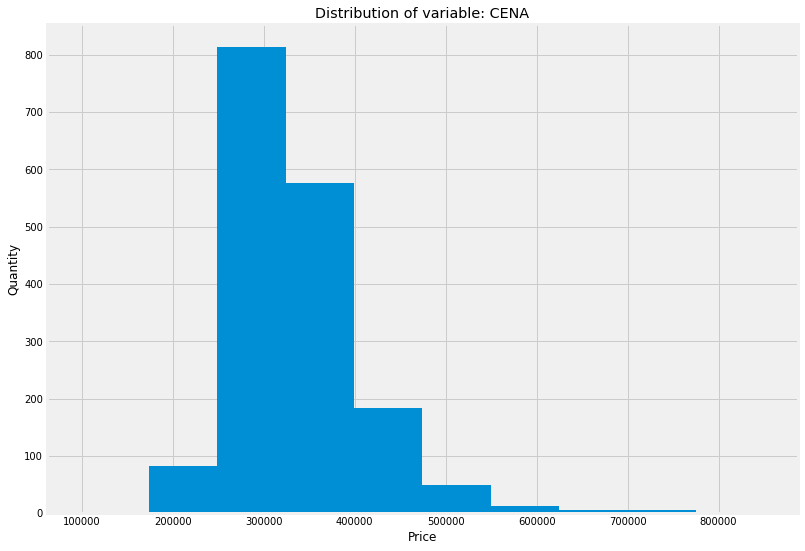

Overall statistic of dataset:
Number of offers all:  1733
Number of offers in district:
                DZIELNICA  Offers
3               Grunwald     318
23                 Wilda     156
15                Rataje     103
25             Winogrady      82
18          Stare Miasto      75
13              Piątkowo      69
11            Naramowice      67
8                 Jeżyce      59
4                Górczyn      42
14              Podolany      37
30                Łazarz      34
20             Strzeszyn      32
17                Sołacz      30
33                Żegrze      24
2                 Dębiec      23
12                Ogrody      22
19             Starołęka      14
31                Śródka      11
1               Chartowo      10
6                 Główna       8
24               Winiary       8
5               Głuszyna       7
9               Junikowo       3
22           Warszawskie       2
7   Jana III Sobieskiego       2
10            Komandoria       2
27                Za

In [12]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65)
Histogram("CENA", fdataset)
Statistics(fdataset)

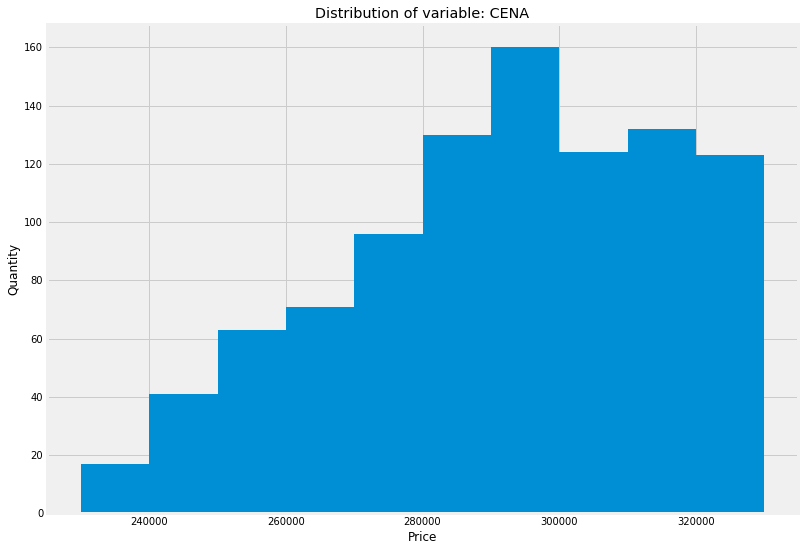

Overall statistic of dataset:
Number of offers all:  957
Number of offers in district:
                DZIELNICA  Offers
3               Grunwald     176
22                 Wilda      98
15                Rataje      64
24             Winogrady      63
13              Piątkowo      40
11            Naramowice      36
14              Podolany      35
8                 Jeżyce      32
4                Górczyn      17
30                Żegrze      16
20             Strzeszyn      14
28                Łazarz      14
2                 Dębiec      14
18          Stare Miasto      13
12                Ogrody      11
19             Starołęka      10
1               Chartowo       7
17                Sołacz       7
23               Winiary       6
6                 Główna       6
29                Śródka       5
5               Głuszyna       3
26                Zawady       2
0              Antoninek       2
21           Warszawskie       2
7   Jana III Sobieskiego       2
25                  W

In [13]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000)
Histogram("CENA", fdataset)
Statistics(fdataset)

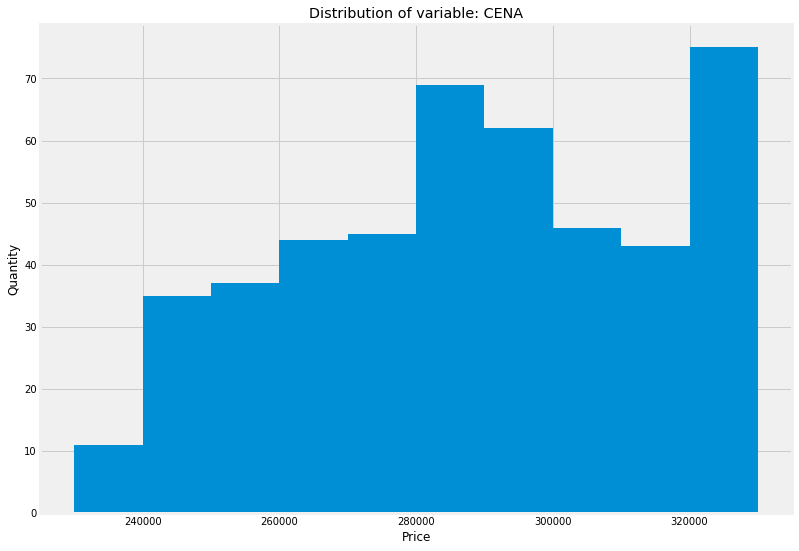

Overall statistic of dataset:
Number of offers all:  467
Number of offers in district:
                DZIELNICA  Offers
3               Grunwald      67
14                Rataje      64
23             Winogrady      52
10            Naramowice      33
21                 Wilda      30
7                 Jeżyce      25
12              Piątkowo      21
2                 Dębiec      14
25                Łazarz      13
17          Stare Miasto       9
11                Ogrody       8
27                Żegrze       8
16                Sołacz       7
22               Winiary       6
1               Chartowo       5
18             Starołęka       4
19             Strzeszyn       4
4                Górczyn       4
13              Podolany       3
26                Śródka       3
20           Warszawskie       2
6   Jana III Sobieskiego       2
5                 Główna       2
0              Antoninek       2
9             Komandoria       1
15            Smochowice       1
8               Junik

In [14]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                  price_max = 330000, market = "wtórny")
Histogram("CENA", fdataset)
Statistics(fdataset)

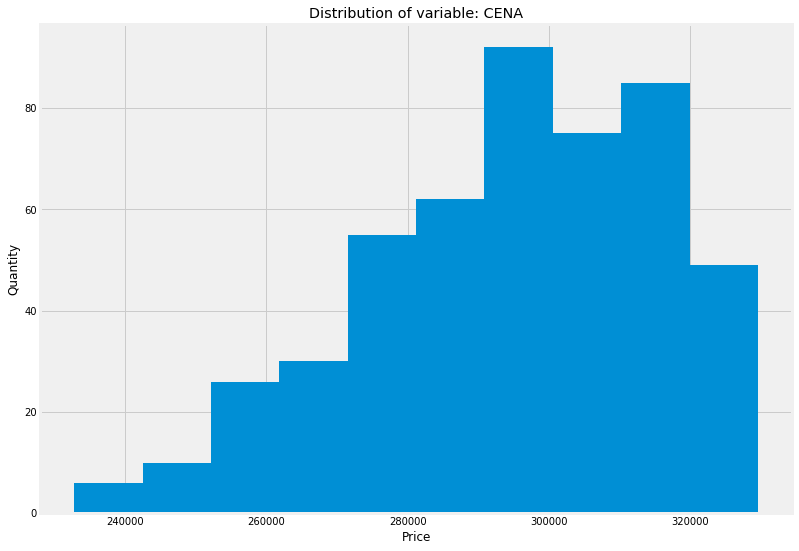

Overall statistic of dataset:
Number of offers all:  490
Number of offers in district:
        DZIELNICA  Offers
1       Grunwald     109
13         Wilda      68
9       Podolany      32
8       Piątkowo      19
2        Górczyn      13
14     Winogrady      11
12     Strzeszyn      10
19        Żegrze       8
5         Jeżyce       7
11     Starołęka       6
10  Stare Miasto       4
4         Główna       4
7         Ogrody       3
6     Naramowice       3
3       Głuszyna       3
15        Zawady       2
18        Śródka       2
0       Chartowo       2
16     Zieliniec       1
17        Łazarz       1 

Number of offers on primary market:  490
Number of offers on secondary market:  0
Average price for square meter: 6,273.43
Average price for square meter primary market: 6,273.43
Average price for square meter secondary market: nan
Average surface of flat: 47.24
Average surface of flat on primary market: 47.24
Average surface of flat on secondary market: nan
Average price all: 294,7

In [15]:
fdataset = Filtered(dataset, min_rooms = 2, max_rooms = 3, min_surface = 40, max_surface = 65, price_min = 230000,
                    price_max = 330000, market = "pierwotny")
Histogram("CENA", fdataset)
Statistics(fdataset)

## Price per square meter